# Classification Of Glass Type

The Glass Type Classification project is a machine learning task aimed at predicting the type or category of glass samples based on their chemical composition. The dataset used for this project contains various attributes, such as Refractive Index (RI), Sodium (Na), Magnesium (Mg), Aluminum (Al), Silicon (Si), Potassium (K), Calcium (Ca), Barium (Ba), and Iron (Fe), which represent the percentage of different oxides in each glass sample.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

The glass type dataset contains information about different glass samples, such as Refractive Index (RI), and the percentages of various chemical components including Sodium (Na), Magnesium (Mg), Aluminum (Al), Silicon (Si), Potassium (K), Calcium (Ca), Barium (Ba), and Iron (Fe). The dataset also includes a "Type" column representing the class or type of each glass sample. This dataset is commonly used for machine learning tasks to predict the glass type based on its chemical composition, which can have practical applications in various industries.

In [3]:
dataframe = pd.read_csv('glass.csv')

# Exploratory Data Analysis

 Exploratory Data Analysis is the process of examining and visualizing data to gain insights, understand patterns, detect anomalies, and formulate hypotheses. EDA involves using various statistical and graphical techniques to summarize and explore the main characteristics of a dataset. It helps in understanding the data's distribution, relationships between variables, and potential trends or outliers. EDA plays a crucial role in data preprocessing and preparation before applying machine learning algorithms or making data-driven decisions.

In [4]:
dataframe.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [5]:
dataframe.tail()

RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7

In [6]:
dataframe.shape

(214, 10)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
dataframe.isna().sum().any()

False

In [9]:
dataframe.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [10]:
dataframe.duplicated().sum()

1

In [11]:
dataframe.drop_duplicates(inplace=True)

In [12]:
dataframe.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [13]:
dataframe['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Distribution Of Different Types Of Glasses

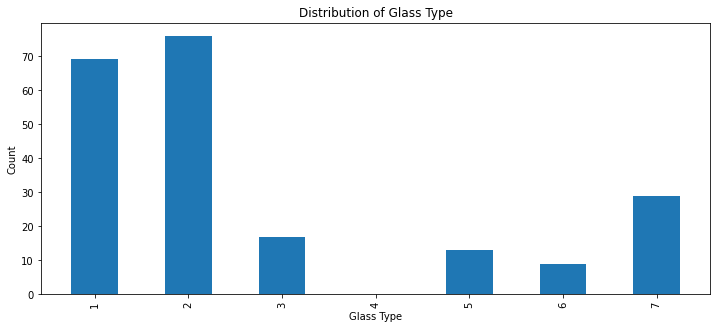

In [14]:
type_counts = dataframe['Type'].value_counts()
plt.figure(figsize=(12, 5))
plt.bar(type_counts.index, type_counts.values, width=0.5)
plt.title('Distribution of Glass Type')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [15]:
dataframe.describe()

RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518348   13.404085    2.679202    1.449484   72.655070    0.498873   
std      0.003033    0.816662    1.443691    0.495925    0.773998    0.653185   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.954085    0.175869    0.057277    2.788732  
std      1.425882    0.498245    0.097589    2.105130  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.150000    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [16]:
corr_matrix = dataframe.corr()

In [17]:
corr_matrix

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   

            Ba        Fe      Type  
RI    0.001679  0.147083 -0.160140  
Na    0.329080 -0.239374  0.508837  
Mg   -0.491818  0.085426 -0.744195  
Al    0.480642 -0.080583  0.597432  
Si   -0.104389 -0.097717  0.147725  
K    -0.043653 -0.009372 -0.012455  
Ca   -0.112208  0.126314  0.002677  
Ba    1.000000 -0.059729  0.574896  
Fe   -0.059729  1.000000 -0.191090  
Type  0.574896 -0.191090  1.000000

<AxesSubplot:>

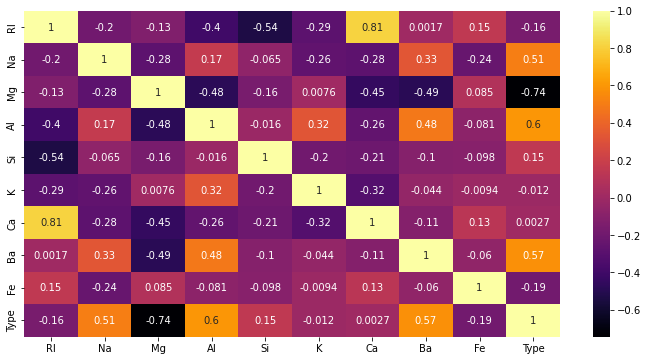

In [18]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

In [19]:
dataframe.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [20]:
dataset = dataframe.drop('Type', axis = 1)

In [21]:
dataset.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

<AxesSubplot:title={'center':'Correlation With Glass Type'}>

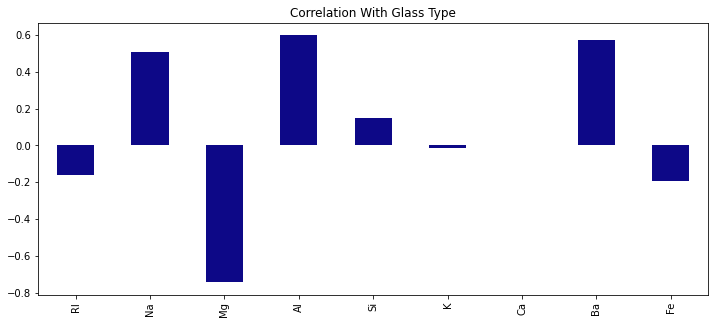

In [22]:
dataset.corrwith(dataframe['Type']).plot.bar(
    title = 'Correlation With Glass Type', 
    figsize = (12, 5), 
    rot = 90, 
    cmap = 'plasma'
)

In [23]:
dataframe.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing

In [24]:
x = dataframe.drop('Type', axis = 1)
y = dataframe['Type']

In [25]:
x.shape, y.shape

((213, 9), (213,))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

# Model Selection And Training 

Model selection is the process of choosing the most suitable machine learning algorithm for a specific task by comparing and evaluating different models' performance. Model training involves feeding the selected model with training data, allowing it to learn patterns and relationships within the data. During training, the model's internal parameters are adjusted iteratively to minimize the difference between its predictions and the actual target values in the training data. The trained model can then be used to make predictions on new, unseen data.

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(n_estimators= 500, 
                            criterion= 'entropy', 
                            max_depth= None, 
                            min_samples_split = 2, 
                            min_samples_leaf = 1, 
                            max_features = 'sqrt' )

In [32]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [33]:
y_pred = clf.predict(x_test)

In [34]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 2, 5, 2, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 3, 2, 2, 7, 5, 3, 2, 2, 1, 2, 1],
      dtype=int64)

# Error Analysis


Error analysis is a crucial step in the evaluation and improvement of machine learning models. It involves the systematic examination and understanding of the errors made by the model during prediction. The primary goal of error analysis is to identify patterns and sources of mistakes made by the model, which can provide valuable insights into its performance and guide improvements.

Recall score, precision score, accuracy score, classification score, and confusion matrix are vital evaluation metrics in classification models. Recall measures the ability to correctly detect positive instances, while precision measures the accuracy of positive predictions. Accuracy gauges overall correctness, but it may be misleading in imbalanced datasets. The classification score is a comprehensive view of multiple metrics. The confusion matrix visually presents model predictions against actual labels, helping calculate TP, TN, FP, and FN. These metrics and the confusion matrix offer valuable insights into model performance, guiding decisions for improvement and optimization.

In [39]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, confusion_matrix

In [40]:
accuracy_score = accuracy_score(y_pred, y_test)
print('Accuracy Score:', accuracy_score)

Accuracy Score: 0.8372093023255814


In [42]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision Score:", precision)

Precision Score: 0.8591234347048301


In [43]:
recall_score = recall_score(y_pred, y_test, average = 'weighted')
print('Recall Score :', recall_score)

Recall Score : 0.8372093023255814


In [46]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      0.77      0.87        13
           2       0.80      0.80      0.80        15
           3       0.67      1.00      0.80         2
           5       1.00      0.75      0.86         4
           6       0.67      1.00      0.80         2
           7       0.78      1.00      0.88         7

    accuracy                           0.84        43
   macro avg       0.82      0.89      0.83        43
weighted avg       0.86      0.84      0.84        43



In [47]:
confusion_matrix = confusion_matrix(y_pred, y_test)

In [48]:
confusion_matrix

array([[10,  2,  1,  0,  0,  0],
       [ 0, 12,  0,  0,  1,  2],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

<AxesSubplot:>

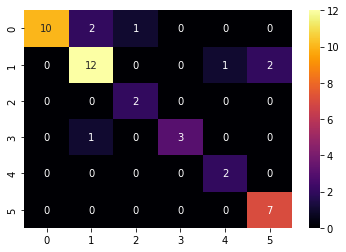

In [49]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'inferno')

# Thanks !